In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../data/dados_limpos.csv')

In [4]:
df['Data'] = pd.to_datetime(df['Data'])

# Forma de Pagamento mais Utilizadas

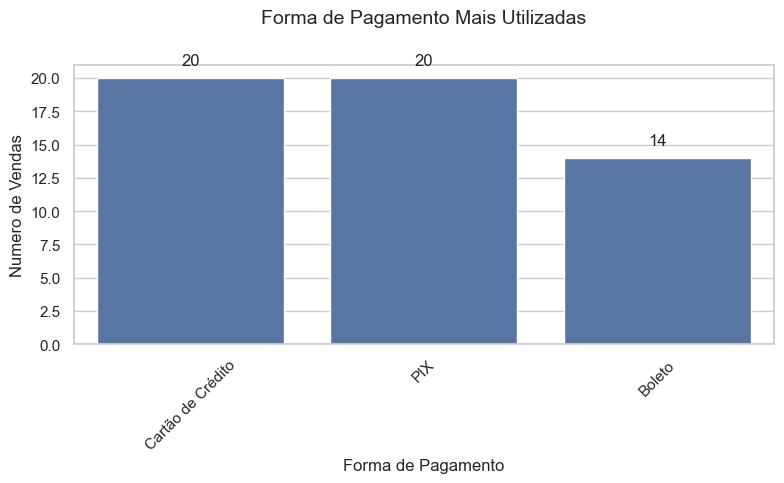

In [7]:
plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")

ax = sns.countplot(data=df,
                   x='Forma_Pagamento',
                   order=df['Forma_Pagamento'].value_counts().index)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 1,
            f'{int(height)}',
            ha="center")
    
plt.title('Forma de Pagamento Mais Utilizadas', fontsize=14, pad=30)
plt.xlabel('Forma de Pagamento')
plt.ylabel('Numero de Vendas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Quantidade Total Vendida por Categoria

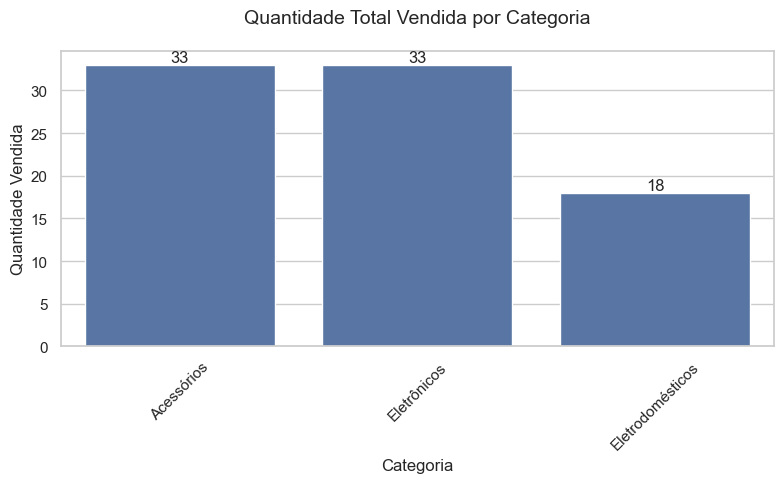

In [8]:
categorias_vendas = df.groupby('Categoria')['Quantidade'].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")

ax = sns.barplot(x=categorias_vendas.index, y=categorias_vendas.values)

for i, v in enumerate(categorias_vendas.values):
    ax.text(i, v + max(categorias_vendas.values)*0.01, str(int(v)), ha='center')

plt.title('Quantidade Total Vendida por Categoria', fontsize=14, pad=20)
plt.xlabel('Categoria')
plt.ylabel('Quantidade Vendida')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Quais sãos os produtos mais vendidos

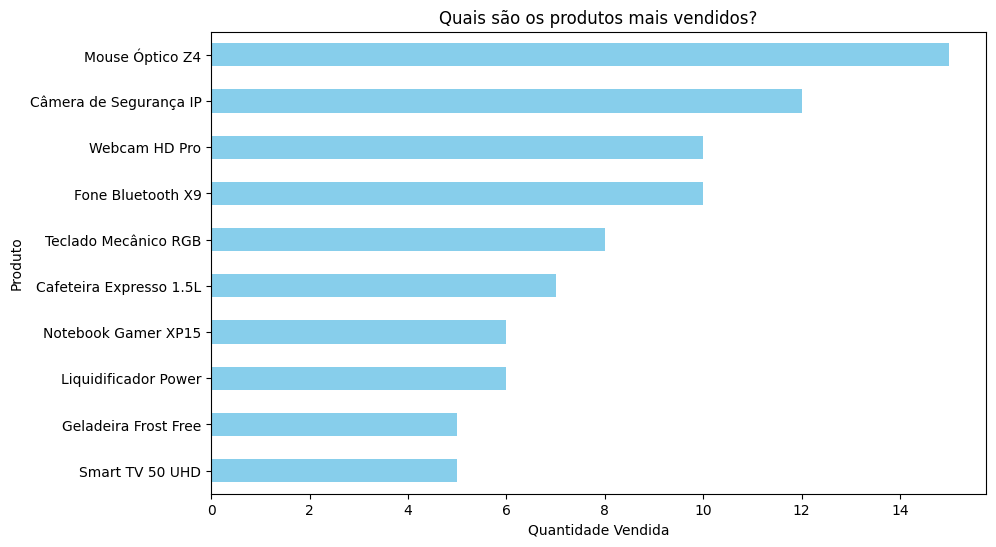

In [6]:
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=False).head(10).plot(
    kind="barh", figsize=(10, 6), color="skyblue", title="Quais são os produtos mais vendidos?"
)

plt.xlabel("Quantidade Vendida")
plt.ylabel("Produto")
plt.gca().invert_yaxis()
plt.show()

# Produtos que geram maior receita

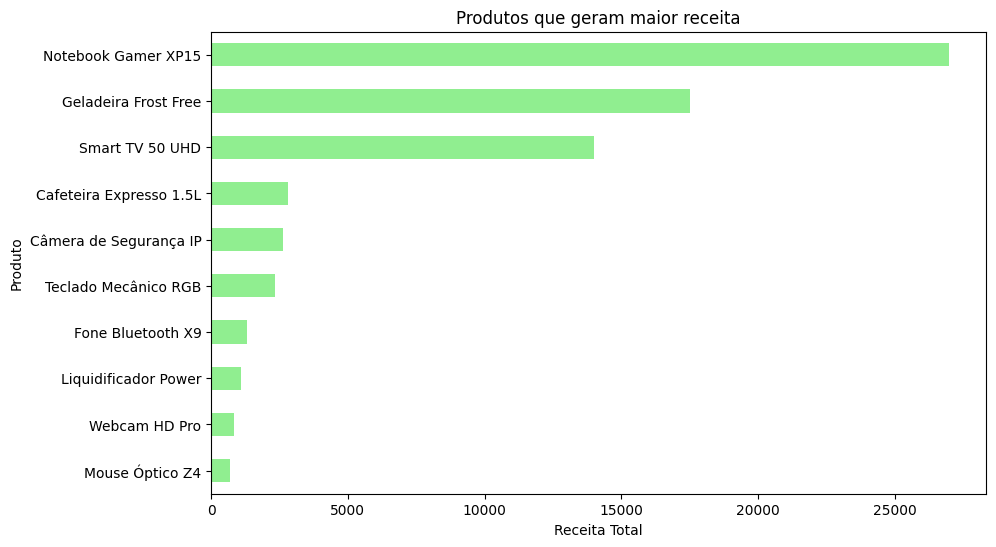

In [7]:
df.groupby("Produto")["Valor_Total"].sum().sort_values(ascending=False).head(10).plot(
    kind="barh", figsize=(10, 6), color="lightgreen", title="Produtos que geram maior receita"
)

plt.xlabel("Receita Total")
plt.ylabel("Produto")
plt.gca().invert_yaxis()
plt.show()

# Receita por Categoria

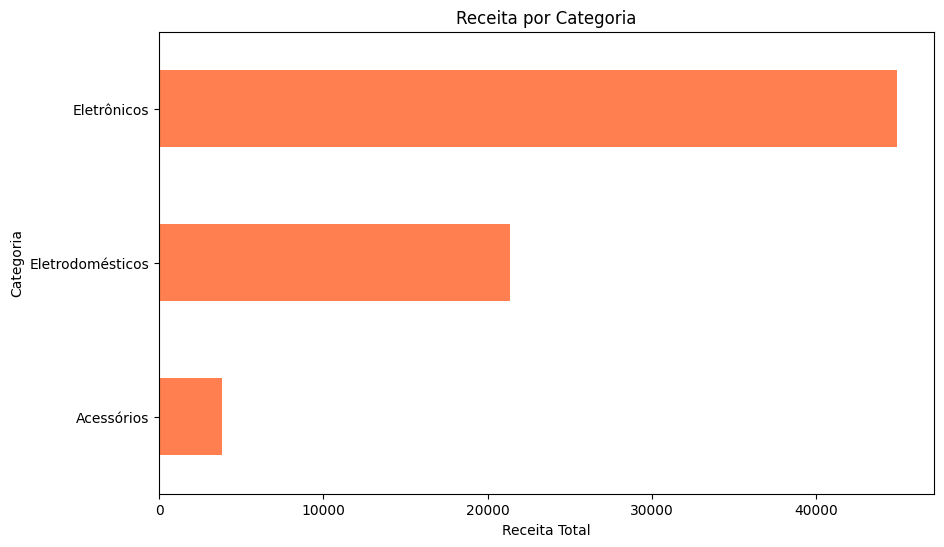

In [8]:
df.groupby("Categoria")["Valor_Total"].sum().sort_values(ascending=False).plot(
    kind="barh", figsize=(10, 6), color="coral", title="Receita por Categoria"
)

plt.xlabel("Receita Total")
plt.ylabel("Categoria")
plt.gca().invert_yaxis()
plt.show()